In [18]:
from pdf2image import convert_from_path

pdfs = "./ML_intern_task_2022.pdf"
pages = convert_from_path(pdfs, 350, poppler_path="./poppler/bin")

# pages[1].save("image.jpg", "JPEG")
for i,page in enumerate(pages):
    image_name = "page_" + str(i+1) + ".jpg"  
    page.save(image_name, "JPEG")

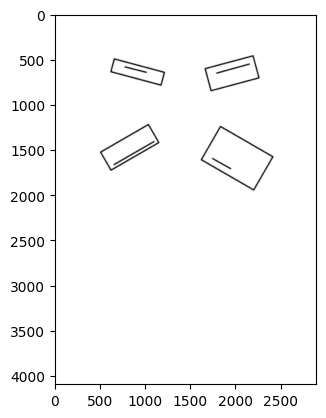

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path="./page_2.jpg"

img = cv2.imread(image_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img)


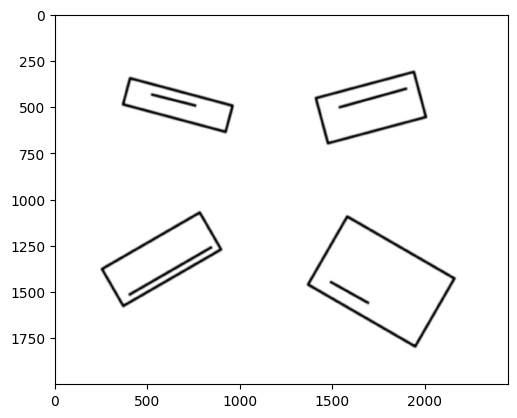

In [6]:
new_img = img[150:2150,250:2700,:]
plt.imshow(new_img)

In [ ]:
# (thresh, blackAndWhiteImage) = cv2.threshold(img, 175, 255, cv2.THRESH_BINARY)
# cv2.imshow('Black white image', blackAndWhiteImage)
# cv2.waitKey(0)

Original Dimensions :  (2000, 2450, 3)
Resized Dimensions :  (500, 612, 3)


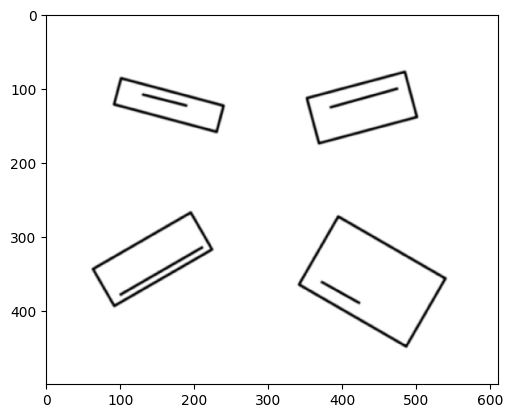

In [7]:
# Resizing

print('Original Dimensions : ',new_img.shape)
 
scale_percent = 25 # percent of original size
width = int(new_img.shape[1] * scale_percent / 100)
height = int(new_img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(new_img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
# plt.imshow(resized)

# converting to gray
gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
plt.imshow(resized)

In [44]:
def get_corners(img,max_corners=24):
    if img.shape.__len__() > 2:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = np.float32(img)
    corners = cv2.goodFeaturesToTrack(img, max_corners, 0.01, 10)
    corners = np.int0(corners)
    corners = corners.reshape(max_corners,2)
    return corners
def get_new_img_from_corners(img,corners,pad=10):
    r = corners[:,1]
    c = corners[:,0]
    r1,r2 = min(r)-pad,max(r)+pad
    c1,c2 = min(c)-pad,max(c)+pad
    # print(r1,r2,c1,c2)
    return img[r1:r2,c1:c2]

def get_cropped_and_corners(img,pad=10):
    corners = get_corners(img)
    cropped = get_new_img_from_corners(img,corners,pad)
    # plt.imshow(cropped)
    return cropped, corners
c_im = get_cropped_and_corners(resized)

In [134]:
im = c_im[0].copy()
def visualize_corners(img):
    for corner in get_corners(img,max_corners=6):
        x,y = corner
        cv2.circle(img,(x,y),3,255,-1)
        
    cv2.imshow('Corner',img)
    cv2.waitKey(0)
    
for corner in get_corners(im):
    x,y = corner
    cv2.circle(im,(x,y),3,255,-1)
    
cv2.imshow('Corner',im)
cv2.waitKey(0)
# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
# cv2.imwrite("newimage.jpg", img)

-1

In [14]:
%%time
def crop(img,pad=0,step=1):
    print("Original image shape: ",img.shape)
    def find_indices(img_array,shape,col_wise=False):
        a = []
        for i in range(0,shape,step):
            u = np.unique(img_array[:,i]) if col_wise else np.unique(gray[i]) 
            if len(u) > 1:
                a.append(i)
        a1 = min(a)- pad
        a2 = max(a) + pad
        return a1,a2

    x1, x2 = find_indices(img,img.shape[1],col_wise=True)
    y1, y2 = find_indices(img,img.shape[0])
    print(x1,y1,x2,y2)
    new_img=img[y1:y2,x1:x2]
    print("Cropped image shape: ",new_img.shape)
    # plt.imshow(new_img) 
    return new_img.copy()
cp= crop(gray,pad=4,step=10)

def divide(img,ratio=0.5):
    r,c,_ = img.shape
    r1,c1=int(r*ratio),int(c*ratio)
    im1 = img[:r1,:c1,:]
    im2 = img[:r1,c1:,:]
    im3 = img[r1:,:c1,:]
    im4 = img[r1:,c1:,:]
    return im1,im2,im3,im4


Original image shape:  (818, 579)
96 86 484 394
Cropped image shape:  (308, 388)
CPU times: total: 0 ns
Wall time: 2.03 ms


In [45]:
# im1,im2,im3,im4 = divide(resized,ratio=0.4)
# cor = get_corners(im1,max_corners=6)
# plt.imshow(im1)

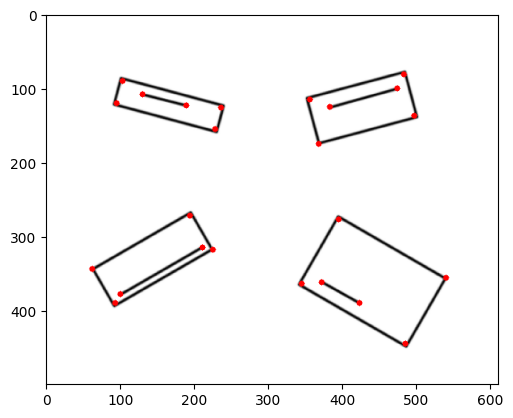

In [10]:
# plt.imshow(im1)
new_im = resized.copy()
imn = cv2.cvtColor(new_im,cv2.COLOR_BGR2GRAY)
# imn = np.float32(imn)
corners = cv2.goodFeaturesToTrack(imn,24, 0.05, 10)
corners = np.int0(corners)
# corners = corners.reshape(24,2)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(new_im,(x,y),4,255,-1)

cv2.imwrite("newimage.jpg", new_im)
# cv2.imshow('Corner',imn)
# cv2.waitKey(0)
plt.imshow(new_im)

[(337, 270, 207, 183),
 (59, 264, 170, 135),
 (88, 83, 156, 80),
 (348, 74, 157, 105)]

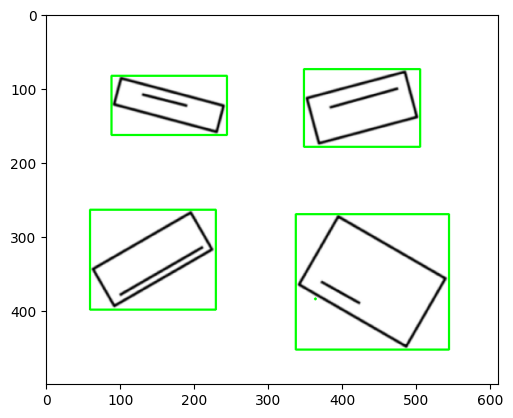

In [8]:
# imgg = cv2.imread("page_2.jpg", -1)
imgg = resized.copy()
oimgg = imgg.copy()
gray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)

binary = cv2.bitwise_not(gray)

(contours,_)= cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

rects = []
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    # print(x,y,w,h)
    # if w > 100 and h > 100 :
      # Calculate the area of each contour
    area = cv2.contourArea(contour)
    if area > 50:
        rects.append((x,y,w,h))
        
    cv2.rectangle(imgg, (x,y), (x+w,y+h), (0,255,0), 2)
    # cv2.drawContours(imgg, [contour],-1,(0,255,0))

# cv2.imwrite('countours.png',imgg)
plt.imshow(imgg)
rects

In [11]:
all_corners  = [a.tolist() for a in corners.reshape(24,2)]

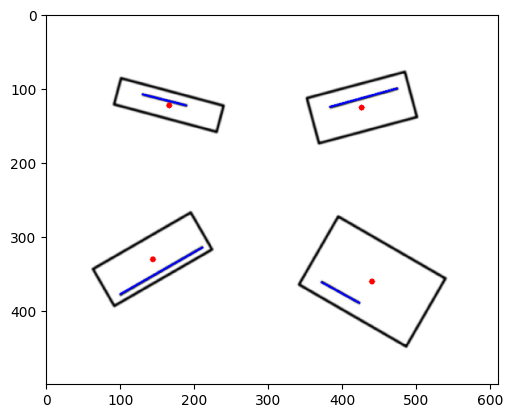

In [15]:
import math
b_im = resized.copy()
rcs = {}
for rect in rects:
    (x,y,w,h) = rect
    c = [x+w//2,y+h//2]
    # print(c,w)
    cv2.circle(b_im,c,4,255,-1)
    filtered = list(filter(lambda x : math.dist(c,x) < w, all_corners))
    ps ={int(math.dist(c,p)):p for p in filtered}
    ps = dict(sorted(ps.items()))
    l1,l2 = list(ps.values())[:2]
    d = int(math.dist(l1,l2))
    rcs[d] = rect
    print()
    # # Green color in BGR
    color = (0, 0, 255)
    
    # Line thickness of 9 px
    thickness = 2
    
    # Using cv2.line() method
    # Draw a diagonal green line with thickness of 9 px
    image = cv2.line(b_im, l1, l2, color, thickness)

plt.imshow(b_im)
pcs = dict(sorted(rcs.items()))

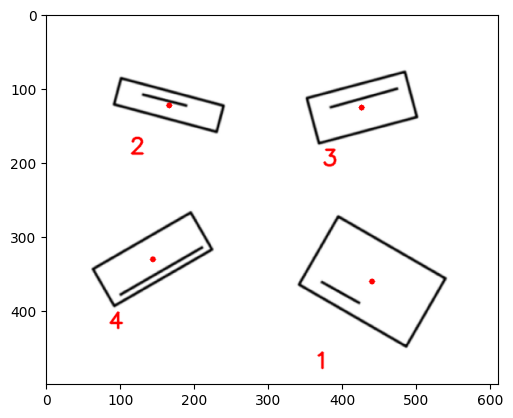

In [49]:
i = 1
for k,v in pcs.items():
    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    (x,y,w,h) = v
    org = (x+25,y+h+25)

    
    # fontScale
    fontScale = 1
    
    # Blue color in BGR
    color = (255, 0, 0)
    
    # Line thickness of 2 px
    thickness = 2
    
    # Using cv2.putText() method
    image = cv2.putText(b_im, f'{i}', org, font, 
                    fontScale, color, thickness, cv2.LINE_AA)
    i+=1
plt.imshow(b_im)

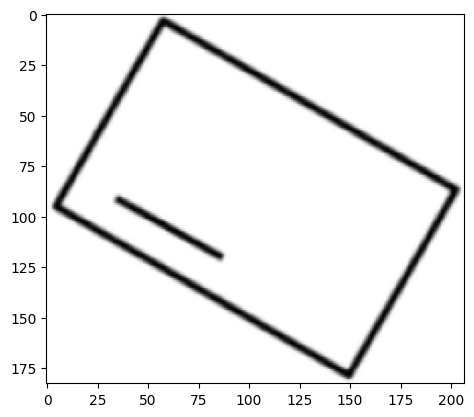

In [50]:
(x,y,w,h) = rects[0]
rmg = oimgg[y:y+h,x:x+w]
plt.imshow(rmg)

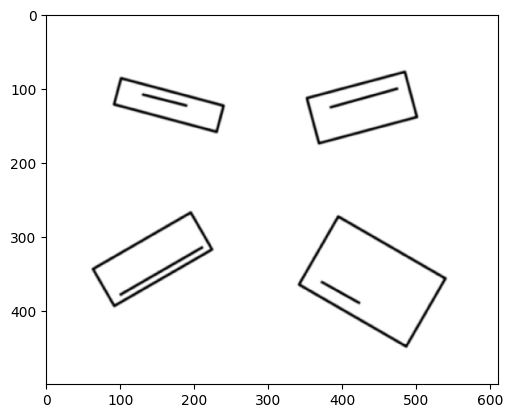

In [62]:
imggg = resized.copy()
plt.imshow(imggg)

In [25]:
pp = resized.copy()

(440, 361) 29
(143, 331) -31
(165, 122) 15
(426, 126) -15


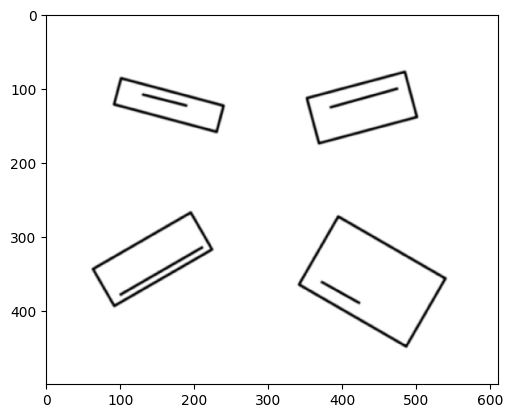

In [28]:
imggg = resized.copy()
for i, c in enumerate(contours):
 
  # Calculate the area of each contour
  area = cv2.contourArea(c)
  if area < 50 : continue

  (x,y,w,h) = cv2.boundingRect(c)
  # cv.minAreaRect returns:
  # (center(x, y), (width, height), angle of rotation) = cv2.minAreaRect(c)
  rect = cv2.minAreaRect(c)
  box = cv2.boxPoints(rect)
  box = np.int0(box)

  # Retrieve the key parameters of the rotated bounding box
  center = (int(rect[0][0]),int(rect[0][1])) 
  width = int(rect[1][0])
  height = int(rect[1][1])
  angle = int(rect[2])

  if width < height:
    angle = -(90 - angle)
  else:
    angle = angle

  label = f"  RA: {angle} deg"
  # textbox = cv2.rectangle(imggg, (center[0]-35, center[1]-25), 
  #   (center[0] + 295, center[1] + 10), (255,255,255), -1)
  # cv2.putText(imggg, label, (center[0]-70, center[1]+85), 
  #   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
  # cv2.drawContours(imggg,[box],0,(0,0,255),2)

  shape = ( imgg.shape[1], imgg.shape[0] )# cv2.warpAffine expects shape in (length, height)
  print(center,angle)
  matrix = cv2.getRotationMatrix2D( center=center, angle=angle, scale=1 )
  image = cv2.warpAffine( src=imggg, M=matrix, dsize=shape )

  pp[y:y+h,x:x+w] = image[y:y+h,x:x+w]
  # cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
  # cv2.imwrite(f'patch_{i}.jpg', image)
  plt.imshow(image)

plt.imshow(imggg)

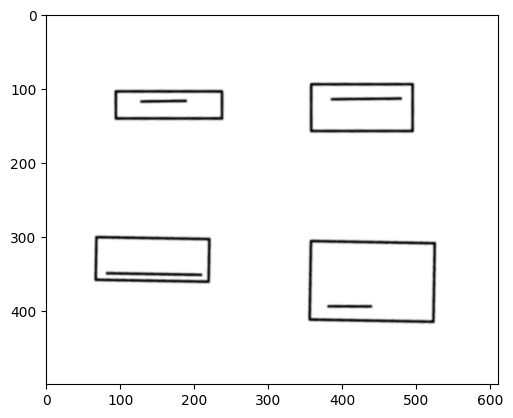

In [66]:
plt.imshow(pp)